In [ ]:
# manual Implementation of Kmeans Clustering     
# importing Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(r"C:\\Users\\ishaa\\OneDrive\\Desktop\\InternshipGenAI\\kaggleDATA\\Mall_Customers.csv")
X = df.drop(['CustomerID', 'Genre'], axis=1).values


# #printing the updated Features 
print(df.head)
print("\n")
print(df.tail)
print(df.describe)

<bound method NDFrame.head of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>


<bound method NDFrame.tail of      CustomerID   Genre  Age  Annual 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()                   # scaling features as the values might contain deviated values 
X_scaled = scaler.fit_transform(X)          

# print(X_scaled)

In [ ]:
#assigning the value of k 
K = 3
np.random.seed(42) # this will help us get the same random result everytime , otherwise if we dont write this , interpreter might take random results everytime 

#inital_centroids.
initial_centroids = X_scaled[            # Pick 3 random customers
    np.random.choice(
        X_scaled.shape[0],               # from total customers (say 200) # finds out the total number of rows in the data say that is 200 
        K,                               # choose 3 indices
        replace=False                    # don't choose the same customer twice
    )
]
centroids = initial_centroids.copy() 
print(centroids)





[[-1.06573534 -0.02137488  0.06987881]
 [-1.20926872 -1.54815205  1.11806095]
 [ 1.51786549 -1.16645776 -1.7935561 ]]


In [38]:
# now we need to find out which is the closest hence we need to calculate the Closest value for it to be assigned to a cluster 
def assign_clusters(X, centroids):
    labels = []  # This will store the cluster index for each customer
    
    for point in X:  # For every customer in the dataset that is present in the data
        distances = []  # This will store distances from this point to each centroid
        
        for centroid in centroids:
            # Manually calculate Euclidean distance:
            distance = 0
            for i in range(len(point)):  # For each dimension (e.g., Age, Income, Score)
                distance += (point[i] - centroid[i]) ** 2  # Square of the difference but not yer considering the underroot
            
            distance = distance ** 0.5  # Taking underooot 
            distances.append(distance)  # Add this distance to list the distance for one point one by one will be appended to the variable that has all distances 
        
        # Find the index of the closest centroid (smallest distance)
        labels.append(distances.index(min(distances)))
    
    return np.array(labels)  # Convert the list to a NumPy array



In [34]:
#now we need to update the centroids as we need to update the centroids from the previous one 
def update_centroids(X, labels , K):
    new_centroids = []

    for k in range(K): #loop for each cluster 
        cluster_points = X[labels == k]   # points in the cluster 

        if len(cluster_points) > 0 :
            new_centroid = cluster_points.mean(axis = 0)
        else:
            new_centroid = X[np.random.randint(0,X.shape[0])]
        new_centroids.append(new_centroid)

    return np.array(new_centroids)    

In [44]:
max_iters = 100           # Just in case, we stop after 100 tries
tolerance = 1e-4          # If centroids move less than this, we stop

for i in range(max_iters):
    labels = assign_clusters(X_scaled, centroids)           # Step 4: Assign each point to closest centroid
    new_centroids = update_centroids(X_scaled, labels, K)   # Step 5: Recalculate centroids

    shift = np.abs(new_centroids - centroids)               # How much did the centroids move?

    if np.all(shift < tolerance):                           # If movement is very small → Stop!
        print(f"COMPLETED IN ;{i+1} iterations.")
        break

    centroids = new_centroids                               # Update for next round


COMPLETED IN ;1 iterations.


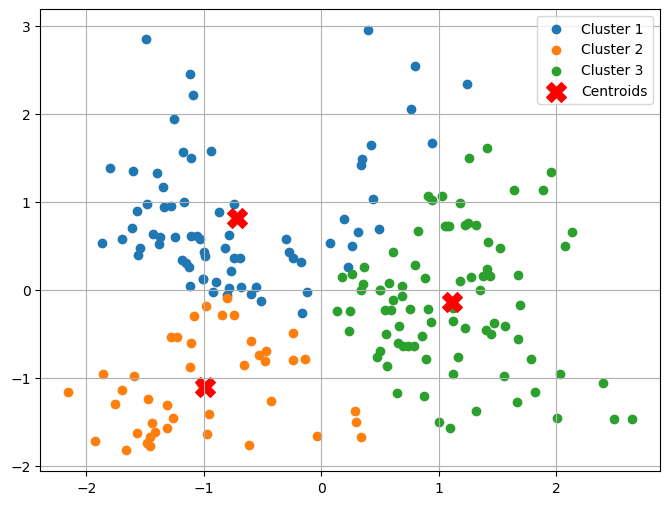

In [48]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce the scaled 3D data to 2D for easy visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(centroids)

# Create a scatter plot
plt.figure(figsize=(8, 6))

# Plot each cluster in a different color
for k in range(K):
    plt.scatter(X_pca[labels == k, 0], X_pca[labels == k, 1], label=f'Cluster {k+1}')

# Plot centroids as big black 'X'
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            color='RED', marker='X', s=200, label='Centroids')

plt.legend()
plt.grid(True)
plt.show()
